In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress

In [62]:
metab_file_grouping = pd.read_csv(r'..\data\metadata\20210831_KAO_HILIC_Huishi_sequence.csv',
                               skiprows=1)
metab_file_grouping['analytical_order'] = list(range(0,69))
metab_file_grouping = metab_file_grouping[['File Name', 'analytical_order']]

bad_file = '20210831_KAO_HILIC_ACN'  # file size is only 800 kB and it failed to convert in MSConvert
typo_files = {'20210831_KAO_HILIC_T193M20210406_9wk_RBG': '20210831_KAO_HILIC_T1093M_20210406_9wk_RBG',
              '20210831_KAO_HILIC_T1092_20210410_10wk_FBG': '20210831_KAO_HILIC_T1092M_20210410_10wk_FBG',
              '20210831_KAO_HILIC_T112M_20210330_8wk_RBG': '20210831_KAO_HILIC_T1102M_20210330_8wk_RBG',
              '20210831_KAO_HILIC_T1092M_20210402_wk_FBG': '20210831_KAO_HILIC_T1092M_20210402_9wk_FBG'}
qc_files = list(metabolomics_seq[metabolomics_seq['File Name'].str.contains('human')]['File Name'].values)
blank_files = ['20210831_KAO_HILIC_ACN', '20210831_KAO_HILIC_ACN_20210831232610',
               '20210831_KAO_HILIC_extraction_blank_1', '20210831_KAO_HILIC_extraction_blank_1_20210901004002']

def fix_filename(original_filename):
    if original_filename in typo_files:
        return typo_files[original_filename]
    else:
        return original_filename

metab_file_grouping['fixed_filename'] = metab_file_grouping['File Name'].apply(fix_filename)

metab_file_grouping['qc_file'] = metab_file_grouping['File Name'].isin(qc_files)
metab_file_grouping['quant_file'] = metab_file_grouping['fixed_filename'].str.contains('HILIC_T')
metab_file_grouping['blank_file'] = metab_file_grouping['File Name'].isin(blank_files)
metab_file_grouping = metab_file_grouping.drop(0)  # File is 800 kB and doesn't open

metab_file_grouping['animal'] = metab_file_grouping['fixed_filename'].str.split('HILIC_T').str[1].str.split('M_2021').str[0]
metab_file_grouping['week'] = metab_file_grouping[metab_file_grouping['quant_file'] == True]\
                                 ['fixed_filename'].str.split('wk_').str[0].str.split('_').str[-1]
metab_file_grouping['bg_type'] = metab_file_grouping[metab_file_grouping['quant_file'] == True]\
                                   ['fixed_filename'].str.split('_').str[-1]

metab_file_grouping[metab_file_grouping['quant_file'] == True]

,File Name,analytical_order,fixed_filename,qc_file,quant_file,blank_file,animal,week,bg_type
5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,True,False,1060,9,RBG
6,20210831_KAO_HILIC_T1076M_20210329_9wk_FBG,6,20210831_KAO_HILIC_T1076M_20210329_9wk_FBG,False,True,False,1076,9,FBG
7,20210831_KAO_HILIC_T1092M_20210413_10wk_RBG,7,20210831_KAO_HILIC_T1092M_20210413_10wk_RBG,False,True,False,1092,10,RBG
8,20210831_KAO_HILIC_T1101M_20210327_8wk_FBG,8,20210831_KAO_HILIC_T1101M_20210327_8wk_FBG,False,True,False,1101,8,FBG
9,20210831_KAO_HILIC_T1062M_20210405_10wk_FBG,9,20210831_KAO_HILIC_T1062M_20210405_10wk_FBG,False,True,False,1062,10,FBG
10,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG,10,20210831_KAO_HILIC_T1101M_20210413_10wk_RBG,False,True,False,1101,10,RBG
11,20210831_KAO_HILIC_T1082M_20210408_10wk_RBG,11,20210831_KAO_HILIC_T1082M_20210408_10wk_RBG,False,True,False,1082,10,RBG
12,20210831_KAO_HILIC_T1092M_20210327_8wk_FBG,12,20210831_KAO_HILIC_T1092M_20210327_8wk_FBG,False,True,False,1092,8,FBG
13,20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,13,20210831_KAO_HILIC_T1060M_20210322_8wk_FBG,False,True,False,1060,8,FBG
14,20210831_KAO_HILIC_T1093M_20210330_8wk_RBG,14,20210831_KAO_HILIC_T1093M_20210330_8wk_RBG,False,True,False,1093,8,RBG


In [ ]:
tf = pd.read_excel(r'..\data\raw\metabolomics\20210904_KAO_Huishi_HILIC_Tracefinder_peakAreas.xlsx',
                   index_col=0)

In [166]:
tf.columns

Index(['Acetyl-L-carnitine', 'Adenosine 5'-monophosphate',
       'Cytidine 5'-diphosphocholine', 'DL-Carnitine', 'DL-Glutamine',
       'DL-Leucine/Isoleucine', 'DL-Lysine', 'DL-Proline', 'Glycine',
       'Guanosine: all right MS2', 'Indole-3-acrylic acid', 'L-(+)-Arginine',
       'L-(+)-Citrulline', 'L(+)-Ornithine', 'L-Alanine', 'L-Aspartic acid',
       'L-Glutamic acid', 'L-Iditol to Six-carbon sugar alcohol',
       'L-Phenylalanine', 'L-Serine', 'L-Tyrosine', 'L-Valine', 'Nicotinamide',
       'O-Butyryl-L-carnitine', 'O-Isovaleryl-L-carnitine: rt a little shift',
       'Pantothenic acid', 'Propionylcarnitine', 'Threonine', 'Tryptophan',
       'α-Lactose'],
      dtype='object')

C:\Users\ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log2
  app.launch_new_instance()


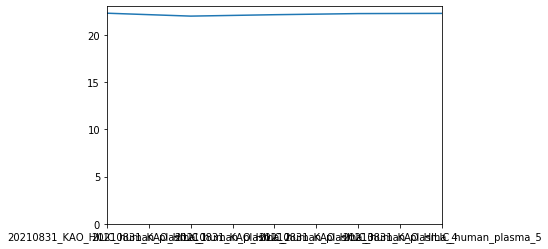

In [104]:


# Some columns have notes in them:
noted_cols = ['Guanosine: all right MS2', 
              'L-Iditol to Six-carbon sugar alcohol', 
              'O-Isovaleryl-L-carnitine: rt a little shift']

quant = tf[tf.index.isin(metab_file_grouping[metab_file_grouping['quant_file'] == True]['File Name'])]
qc = tf[tf.index.isin(metab_file_grouping[metab_file_grouping['qc_file'] == True]['File Name'])]

# Find zeroes
qc[~(qc < 1)]
# Only column "Guanosine: all right MS2" has any zeroes in file 

np.log2(qc).median(axis=1).plot()
plt.ylim(0, 23);

C:\Users\ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


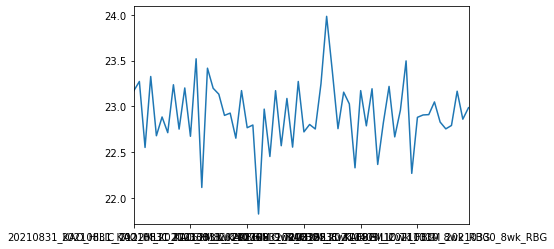

In [110]:
log2quant = np.log2(quant).median(axis=1)
log2quant.plot()


slope:  -0.0006788443306436636
y-intercept:  22.940966206533293
LinregressResult(slope=-0.0006788443306433434, intercept=22.94096620653329, rvalue=-0.03257805942864927, pvalue=0.804826409858866, stderr=0.002734641499292286)


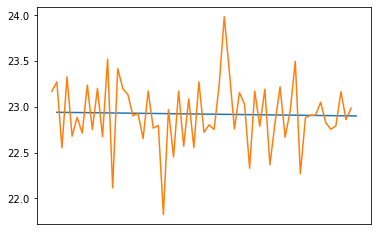

In [165]:
# get linear regression of data
fit = np.polyfit(x=range(1,log2quant.shape[0]+1), y=log2quant, deg=1)
print('slope: ', fit[0])
print('y-intercept: ', fit[1])
print(linregress(np.arange(1, 61), log2quant))
### p-value of 0.8 suggests that there is no need to normalize for intensity drift over time, like we did for lipids

x=np.arange(1, log2quant.shape[0] + 1, dtype='float64')
plt.gca().set_xticks([], [])

plt.plot(x, (fit[0] * x + fit[1]))
plt.plot(log2quant)